In [111]:
#Load packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.dates import DateFormatter

from datetime import datetime

In [112]:
#Import data from NYTimes

data=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv',error_bad_lines=False)
datastate=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv',error_bad_lines=False)

In [113]:
nations=pd.read_csv('C://Users/plame/Downloads/County_AmericanNationsCode.csv') #American Nations sorting of counties

In [114]:
nations['fips']=nations['FIPS']

In [115]:
df=pd.merge(data, nations, on="fips")

In [116]:
df=df.drop(columns=['county','state','fips','NAME','STATE_NAME','FIPS','AN_KEY'])

In [117]:
df=df.pivot_table(index='date',columns='AN_TITLE',aggfunc=sum)

In [118]:
key=[['Deep South','El Norte','Far West','Federal Entity','First Nation'],['Greater Appalachia','Greater Polynesia','Left Coast','Midlands','New France'],['New Netherland','Spanish Caribbean','Tidewater','Yankeedom','Yankeedom']]

In [119]:
df=df.diff()

df=df.rolling(window=7).mean()

df

cases                                                        \
AN_TITLE     Deep South     El Norte     Far West Federal Entity First Nation   
date                                                                            
2020-01-21          NaN          NaN          NaN            NaN          NaN   
2020-01-22          NaN          NaN          NaN            NaN          NaN   
2020-01-23          NaN          NaN          NaN            NaN          NaN   
2020-01-24          NaN          NaN          NaN            NaN          NaN   
2020-01-25          NaN          NaN          NaN            NaN          NaN   
...                 ...          ...          ...            ...          ...   
2020-06-17  4441.285714  4316.571429  2001.428571      44.285714     1.142857   
2020-06-18  4578.428571  4443.142857  2158.571429      44.857143     1.000000   
2020-06-19  4970.857143  4732.714286  2254.714286      42.571429     1.142857   
2020-06-20  5242.714286  5077.857143  2382.428571      39.285714     0.857143   
2020-06-21  5388.714286  5512.857143  2461.714286      36.142857     0.857143   

                                                                          \
AN_TITLE   Greater Appalachia Greater Polynesia  Left Coast     Midlands   
date                                                                       
2020-01-21                NaN               NaN         NaN          NaN   
2020-01-22                NaN               NaN         NaN          NaN   
2020-01-23                NaN               NaN         NaN          NaN   
2020-01-24                NaN               NaN         NaN          NaN   
2020-01-25                NaN               NaN         NaN          NaN   
...                       ...               ...         ...          ...   
2020-06-17        4274.142857          8.428571  550.857143  1834.571429   
2020-06-18        4411.714286         10.000000  578.428571  1789.000000   
2020-06-19        4578.857143         11.857143  588.714286  1799.714286   
2020-06-20        4722.857143         11.428571  614.571429  1717.857143   
2020-06-21        4991.714286         12.285714  656.000000  1806.857143   

                        ...       deaths                                       \
AN_TITLE    New France  ... First Nation Greater Appalachia Greater Polynesia   
date                    ...                                                     
2020-01-21         NaN  ...          NaN                NaN               NaN   
2020-01-22         NaN  ...          NaN                NaN               NaN   
2020-01-23         NaN  ...          NaN                NaN               NaN   
2020-01-24         NaN  ...          NaN                NaN               NaN   
2020-01-25         NaN  ...          NaN                NaN               NaN   
...                ...  ...          ...                ...               ...   
2020-06-17  371.428571  ...          0.0          70.571429               0.0   
2020-06-18  338.714286  ...          0.0          63.285714               0.0   
2020-06-19  321.571429  ...          0.0          62.285714               0.0   
2020-06-20  284.000000  ...          0.0          63.714286               0.0   
2020-06-21  292.000000  ...          0.0          63.857143               0.0   

                                                                               \
AN_TITLE   Left Coast    Midlands New France New Netherland Spanish Caribbean   
date                                                                            
2020-01-21        NaN         NaN        NaN            NaN               NaN   
2020-01-22        NaN         NaN        NaN            NaN               NaN   
2020-01-23        NaN         NaN        NaN            NaN               NaN   
2020-01-24        NaN         NaN        NaN            NaN               NaN   
2020-01-25        NaN         NaN        NaN            NaN               NaN   
...               ...         ...  

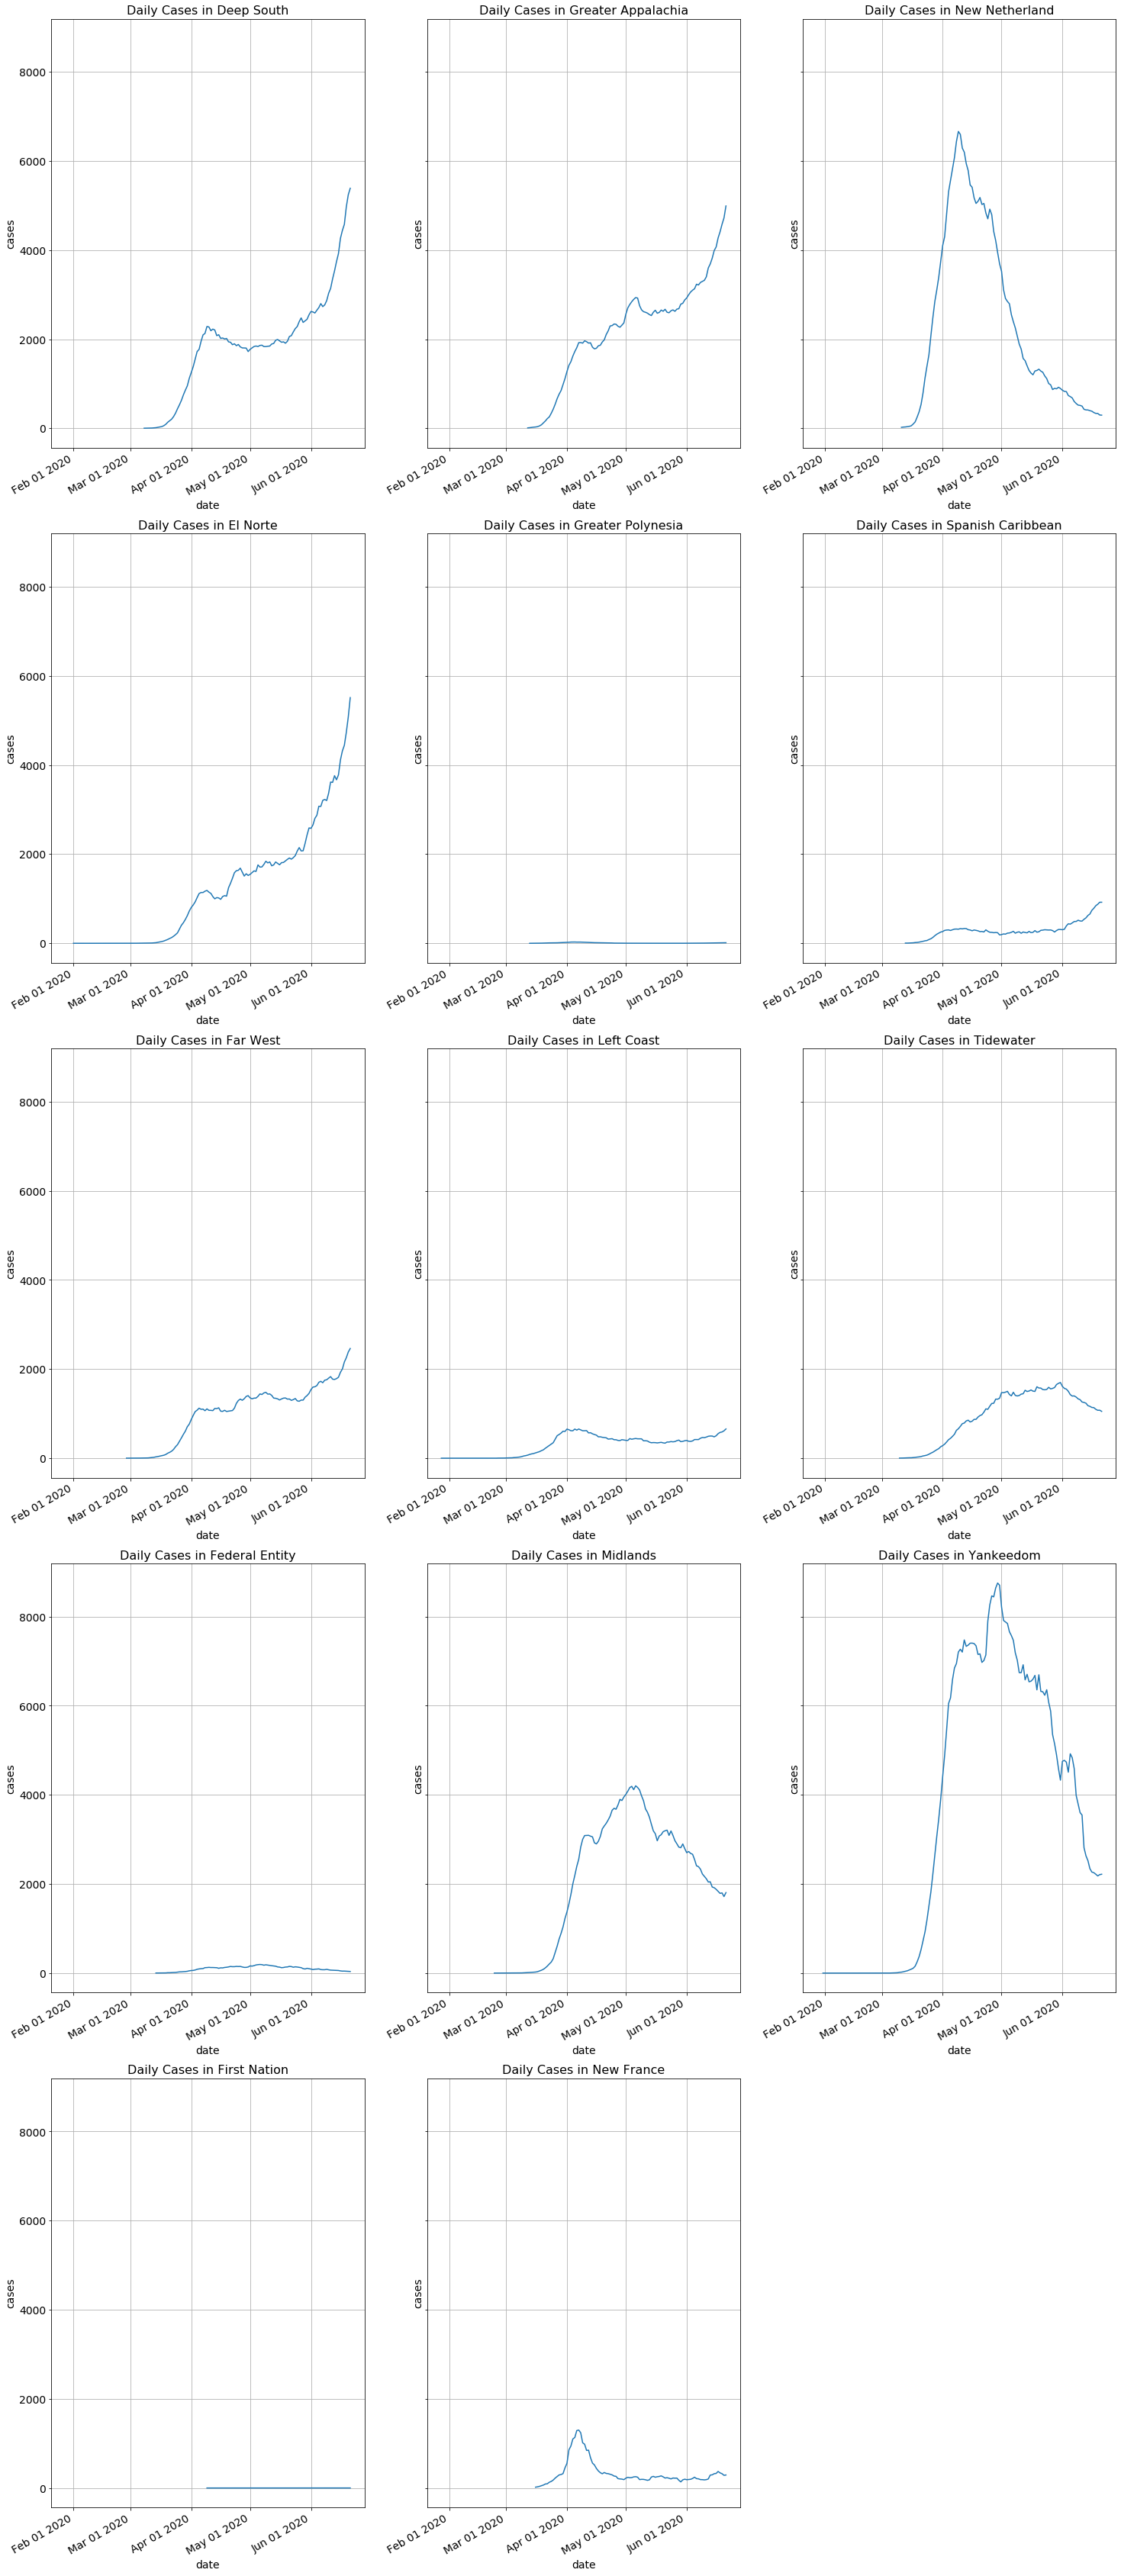

In [121]:
fig,ax = plt.subplots(5,3,figsize=(25,60),sharex=True,sharey=True)

for i in range(5):
    for j in range(3):
        ax[i,j].grid(axis='both')
        ax[i,j].set_xlabel('date',fontsize=14)
        ax[i,j].set_ylabel('cases',fontsize=14)

        ax[i,j].set_title('Daily Cases in '+key[j][i],fontsize=16)
        
        formatter = DateFormatter('%b %d %Y')
        ax[i,j].xaxis.set_major_formatter(formatter)
        
        ax[i,j].plot(pd.to_datetime(df.index),df[('cases', key[j][i])])
                
        ax[i,j].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True,labelsize=14)
        ax[i,j].tick_params(axis='y',labelsize=14)
        
        for label in ax[i,j].get_xticklabels():
            label.set_ha("right")
            label.set_rotation(30)
        
for a in fig.axes:
    a.tick_params(
    axis='x',        
    which='both', 
    bottom=True,
    top=False,
    labelbottom=True)   

ax[4,2].set_visible(False)

plt.show()

In [122]:
fig.savefig('AmericanNations_cases_20200621_sharey_rolling.png')

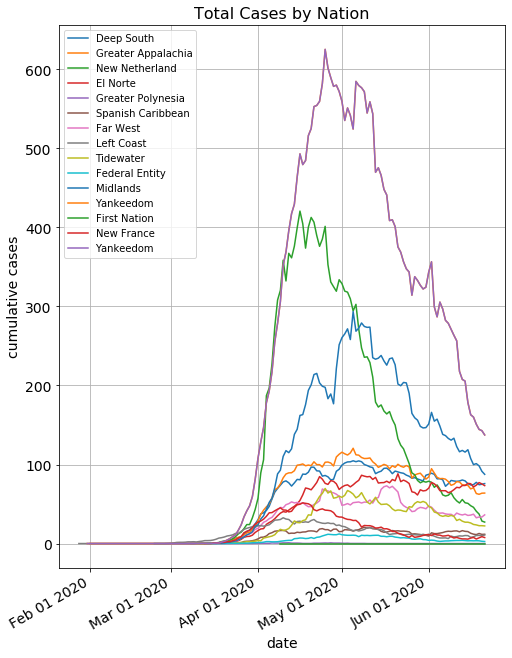

In [123]:
fig,ax = plt.subplots(figsize=(8,10))

for i in range(5):
    for j in range(3):
        ax.grid(axis='both')
        ax.set_xlabel('date',fontsize=14)
        ax.set_ylabel('daily cases',fontsize=14)

        ax.set_title('Daily Cases by Nation',fontsize=16)
        
        formatter = DateFormatter('%b %d %Y')
        ax.xaxis.set_major_formatter(formatter)
        
        ax.plot(pd.to_datetime(df.index),df[('deaths', key[j][i])],label=key[j][i])
           
        ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True,labelsize=14)
        ax.tick_params(axis='y', labelsize=14)

        ax.legend()
        
        for label in ax.get_xticklabels():
            label.set_ha("right")
            label.set_rotation(30)

plt.show()

In [124]:
fig.savefig('AmericanNations_cases_20200621_all_rolling.png',bbox_inches='tight')

In [28]:
df

cases                                                  \
AN_TITLE   Deep South  El Norte  Far West Federal Entity First Nation   
date                                                                    
2020-01-21        NaN       NaN       NaN            NaN          NaN   
2020-01-22        NaN       NaN       NaN            NaN          NaN   
2020-01-23        NaN       NaN       NaN            NaN          NaN   
2020-01-24        NaN       NaN       NaN            NaN          NaN   
2020-01-25        NaN       1.0       NaN            NaN          NaN   
...               ...       ...       ...            ...          ...   
2020-06-16   190463.0  164129.0  114838.0         9818.0         20.0   
2020-06-17   195553.0  169539.0  117085.0         9847.0         22.0   
2020-06-18   200179.0  174981.0  120041.0         9903.0         22.0   
2020-06-19   207408.0  181435.0  122767.0         9952.0         24.0   
2020-06-20   213811.0  188263.0  125547.0         9984.0         25.0   

                                                                      \
AN_TITLE   Greater Appalachia Greater Polynesia Left Coast  Midlands   
date                                                                   
2020-01-21                NaN               NaN        1.0       NaN   
2020-01-22                NaN               NaN        1.0       NaN   
2020-01-23                NaN               NaN        1.0       NaN   
2020-01-24                NaN               NaN        1.0       NaN   
2020-01-25                NaN               NaN        1.0       NaN   
...                       ...               ...        ...       ...   
2020-06-16           215294.0             728.0    42443.0  245157.0   
2020-06-17           220055.0             732.0    43098.0  246970.0   
2020-06-18           225088.0             750.0    43820.0  248976.0   
2020-06-19           231391.0             777.0    44569.0  251238.0   
2020-06-20           236600.0             791.0    45223.0  252768.0   

                       ...       deaths                                       \
AN_TITLE   New France  ... First Nation Greater Appalachia Greater Polynesia   
date                   ...                                                     
2020-01-21        NaN  ...          NaN                NaN               NaN   
2020-01-22        NaN  ...          NaN                NaN               NaN   
2020-01-23        NaN  ...          NaN                NaN               NaN   
2020-01-24        NaN  ...          NaN                NaN               NaN   
2020-01-25        NaN  ...          NaN                NaN               NaN   
...               ...  ...          ...                ...               ...   
2020-06-16    32470.0  ...          0.0             7227.0              17.0   
2020-06-17    32966.0  ...          0.0             7330.0              17.0   
2020-06-18    32966.0  ...          0.0             7399.0              17.0   
2020-06-19    33152.0  ...          0.0             7474.0              17.0   
2020-06-20    33698.0  ...          0.0             7529.0              17.0   

                                                                            \
AN_TITLE   Left Coast Midlands New France New Netherland Spanish Caribbean   
date                                                                         
2020-01-21        0.0      NaN        NaN            NaN               NaN   
2020-01-22        0.0      NaN        NaN            NaN               NaN   
2020-01-23        0.0      NaN        NaN            NaN               NaN   
2020-01-24        0.0      NaN        NaN            NaN               NaN   
2020-01-25        0.0      NaN        NaN            NaN               NaN   
...               ...      ...        ...            ...               ...   
2020-06-16     1676.0  13706.0     2105.0        16634.0            1210.0   
2020-06-17     1681.0  13820.0     2114.0        16668.0            1220.0   
2020-